<a href="https://colab.research.google.com/github/WilkisterMbaka/KNN-and-Naive-Bayes-Classifier/blob/main/Moringa_Data_Science_Core_W9_Independent_Project_2022_06_Wilkister_Mbaka_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Dataset**

## **1.0 Defining The Question**

**a) Specifying the Question**

Perform K-nearest neighbor classification to classify survivors and non-survivors.

**b) Defining the Metric for Success**

Metric of succes is Model accuracy.

**c) Understanding the context**

The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster. 

**d) Recording the Experimental Design**

The experimental design for this project is as follows:

* Loading the libraries and dataset
* Data cleaning and preparation
* Performing the Univariate analysis
* Performing the Bivariate analysis
* Performing the Multivariate analysis
* Applying the K - Nearest Neighbor algorithms
* Applying the GridSearch CV to test through different parameters
* Making predictions using the different models that I've created
* Assesing the accuracy of the models created
* Making conclusions and challenging the solution

**Dataset Column Description**

survival - Survival (0 = No; 1 = Yes)

class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


## **2.0 Reading Data**

In [1]:
#importing Libraries

#importing pandas
import pandas as pd

# Importing Numpy
#
import numpy as np

# Importing Seaborn
#
import seaborn as sns

# Importing Matplotlib
#
import matplotlib.pyplot as plt
# %matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the Data from the source i.e. csv
#
df = pd.read_csv('/content/train (5).csv')

In [3]:
# Loading the Data from the source i.e. csv
#
test = pd.read_csv('/content/test (1).csv')

## **3.0 Checking the Data**

**Train Dataset**

In [4]:
# Check top 5 records
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Check bottom 5 records
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# Determining the no. of records in our dataset
#
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}')

Number of rows: 891 
Number of columns: 12


In [7]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Checking how many unique value are in a column
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
# Check for unique values in each column
column_list = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
for col in column_list:
  print(f'{col} column unique values: \n')
  print(df[col].unique(), end='\n')
  print('**********')
  print('\n')

Survived column unique values: 

[0 1]
**********


Pclass column unique values: 

[3 1 2]
**********


Sex column unique values: 

['male' 'female']
**********


Age column unique values: 

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
**********


SibSp column unique values: 

[1 0 3 4 2 5 8]
**********


Parch column unique values: 

[0 1 2 5 3 4 6]
**********


Fare column unique values: 

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    

## **4.0 Tidying the Dataset**

In [10]:
# Check for missing values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Dealing with the Missing Data
# There are 687 missing records in the cabin column which is more than 75%. The column will be dropped
# There are 2 missing records in the Embarked column, I will drop the 2 entries
#Filling the missing ages with the median in the age in the train data

df['Age'].fillna(df['Age'].median(),inplace=True)
df = df.drop(columns=['Cabin'])
df = df.dropna()

In [12]:
# Check for missing values in the dataset
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
# Check for duplicates
duplicate = df[df.duplicated()]

duplicate

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


There is no duplicate data

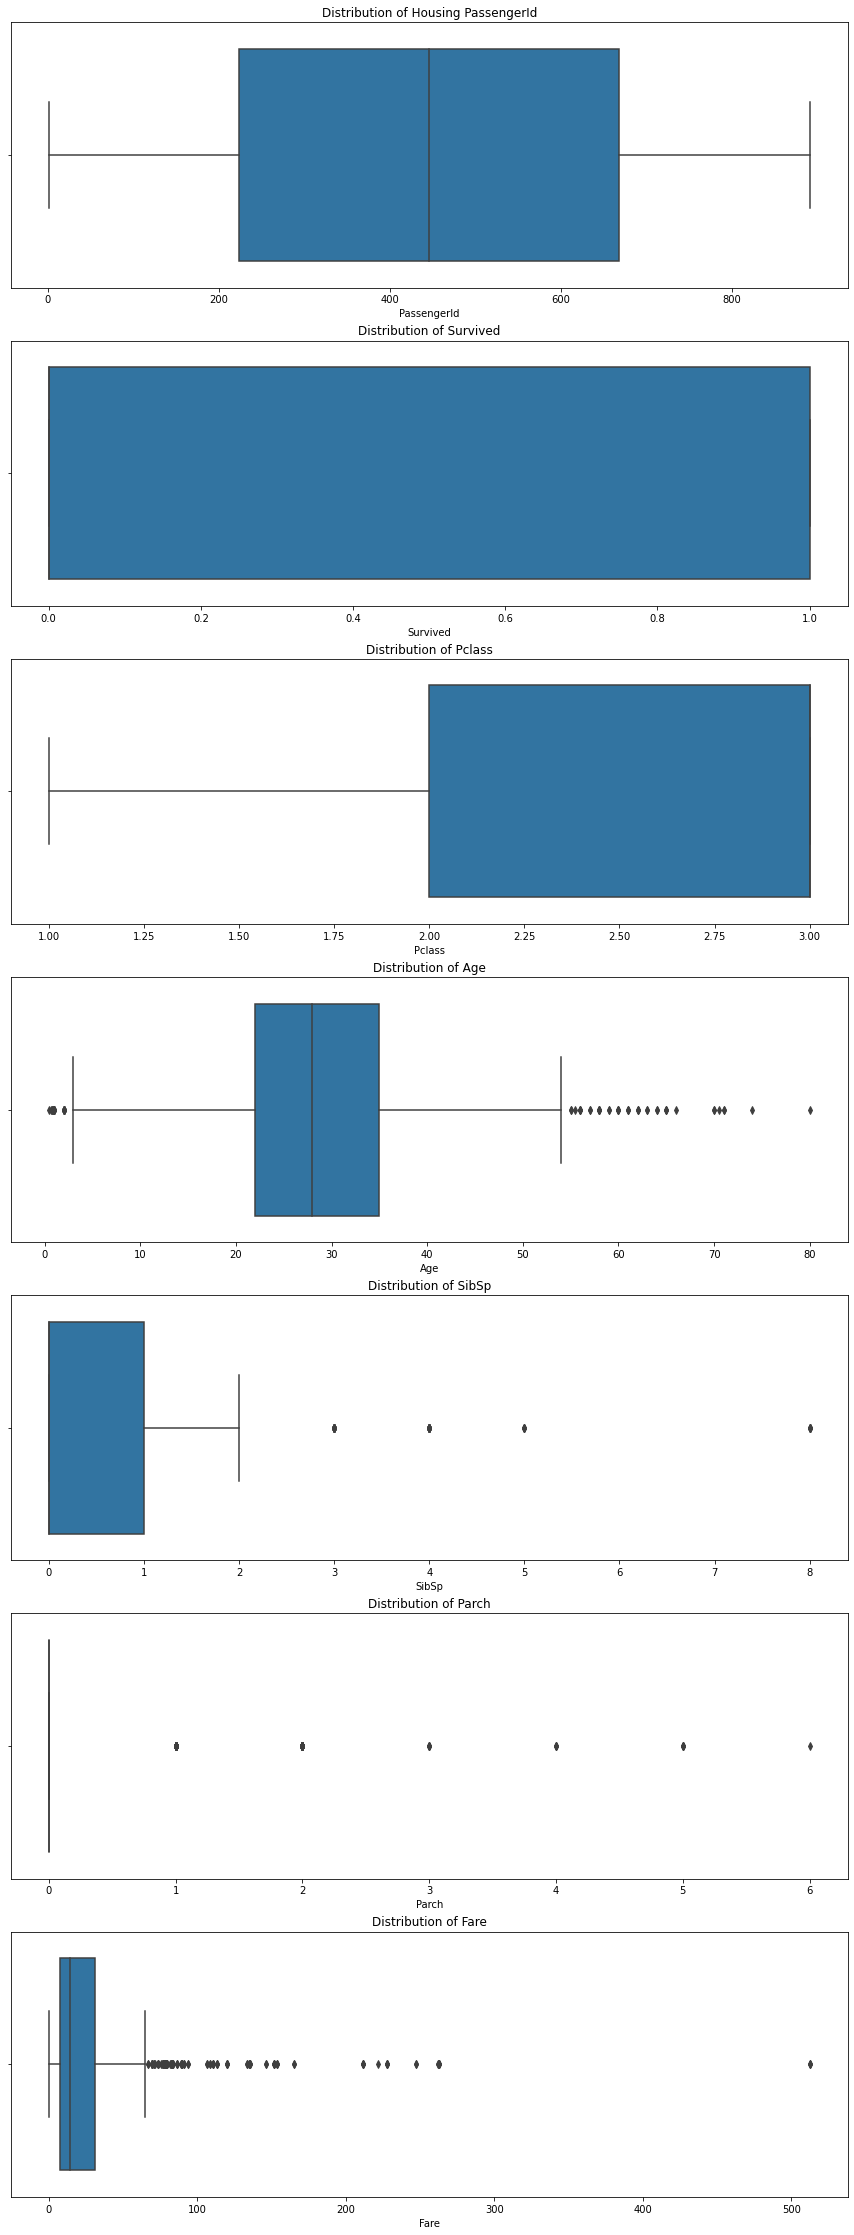

In [14]:
# Check for outliers
fig, ax= plt.subplots(7,1,figsize=[15, 40])

sns.boxplot(data=df, x='PassengerId', ax=ax[0]).set_title('Distribution of Housing PassengerId')
sns.boxplot(data=df, x='Survived', ax=ax[1]).set_title('Distribution of Survived')
sns.boxplot(data=df, x='Pclass', ax=ax[2]).set_title('Distribution of Pclass')
sns.boxplot(data=df, x='Age', ax=ax[3]).set_title('Distribution of Age')
sns.boxplot(data=df, x='SibSp', ax=ax[4]).set_title('Distribution of SibSp')
sns.boxplot(data=df, x='Parch', ax=ax[5]).set_title('Distribution of Parch')
sns.boxplot(data=df, x='Fare', ax=ax[6]).set_title('Distribution of Fare')
plt.show()

There are outliers in the age, SibSp, Fare and Parch columns

In [15]:
# Counting outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


Age             65
Embarked         0
Fare           114
Name             0
Parch          213
PassengerId      0
Pclass           0
Sex              0
SibSp           46
Survived         0
Ticket           0
dtype: int64

There seems to be very many outliers, if we decide to drop them, the data may not be sufficient for the analysis

In [16]:
#Standardizing column names

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

## **5.0 Exploratory Data Analysis**

### **5.1 Univariate Analysis**

In [25]:
num_attributes = df.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

In [26]:
# Getting the univariate describe summary

num_attributes.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
# Dispersion - std, var, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.var ) ).T
d3 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d1, d4, d5] ).T.reset_index()
m.columns = ( ['columns', 'variance', 'range', 'std', 'skew', 'kurtosis'])
m

,columns,variance,range,std,skew,kurtosis
0,passengerid,65973.766029,890.0000,256.853589,0.000000,-1.197156
1,survived,0.236183,1.0000,0.485986,0.484568,-1.769179
2,pclass,0.695940,2.0000,0.834230,-0.636998,-1.269437
3,age,168.418806,79.5800,12.977627,0.508010,1.007820
4,sibsp,1.216794,8.0000,1.103084,3.691058,17.838972
5,parch,0.650131,6.0000,0.806307,2.745160,9.750592
6,fare,2467.063710,512.3292,49.669545,4.801440,33.508477


Our columns sibsp and fare seem to have high kurotsis. This may be an indication of to the data having heavy tails, or outliers.

The age column seems to be normally distributed.

Only age has a negative skew in our data

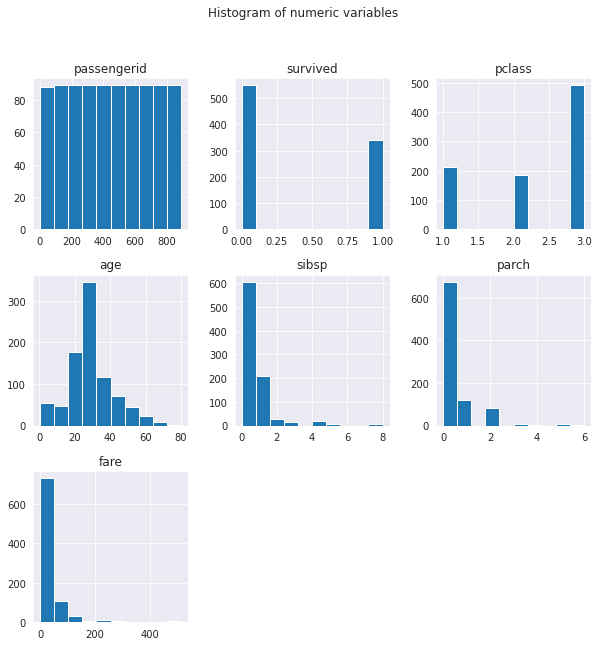

In [28]:
# Plotting the numerical variables on histogram to view their distributions.

df.hist(bins=10, figsize=(10,10))
plt.suptitle("Histogram of numeric variables")
plt.savefig('Fifa Histogram')
plt.show()

In [29]:
# Mode
# Calculating mode across different columns

a = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked']].mode().head(1)

arr = a.to_numpy()
arr

array([[0, 3, 'male', 28.0, 0, 0, 8.05, 'S']], dtype=object)

**Categorical Attributes**

In [30]:
cat_attributes.columns

Index(['name', 'sex', 'ticket', 'embarked'], dtype='object')

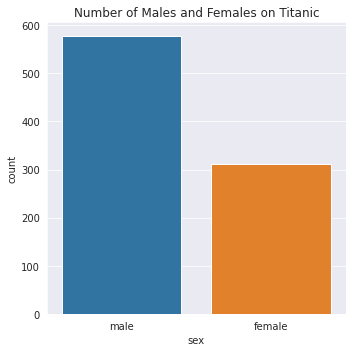

In [31]:
# Countplots
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

sns.countplot(cat_attributes.sex, x='sex')
plt.title('Number of Males and Females on Titanic')

plt.show()

There were more males than females on the titanic

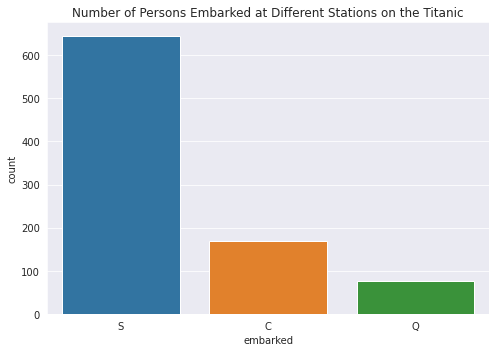

In [32]:
# Countplots
plt.rcParams["figure.figsize"] = [7, 5]
plt.rcParams["figure.autolayout"] = True

sns.countplot(cat_attributes.embarked, x='embarked')
plt.title('Number of Persons Embarked at Different Stations on the Titanic')

plt.show()

More people embarked the titanic at station S

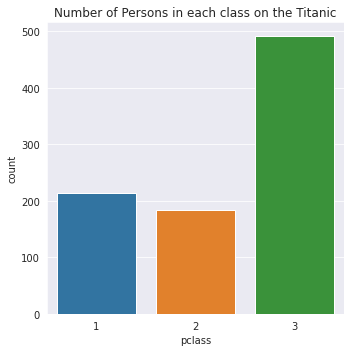

In [33]:
# Countplots
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

sns.countplot(df.pclass, x='pclass')
plt.title('Number of Persons in each class on the Titanic')

plt.show()

Class 3 had the highets number of Passengers

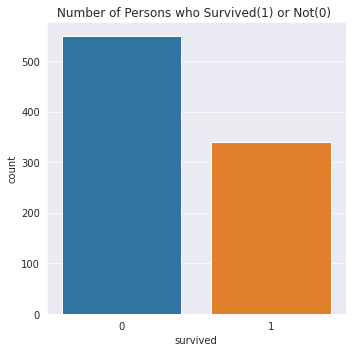

In [34]:
# Countplots
plt.rcParams["figure.figsize"] = [5, 5]
plt.rcParams["figure.autolayout"] = True

sns.countplot(df.survived, x='survived')
plt.title('Number of Persons who Survived(1) or Not(0) ')

plt.show()

More passengers from the tiatnic did not survive

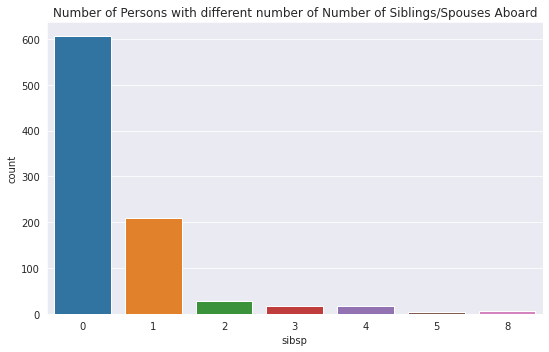

In [35]:
# Countplots
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True

sns.countplot(df.sibsp, x='sibsp')
plt.title('Number of Persons with different number of Number of Siblings/Spouses Aboard')

plt.show()

Majority of the passengers did not have siblings or spouses on the titanic

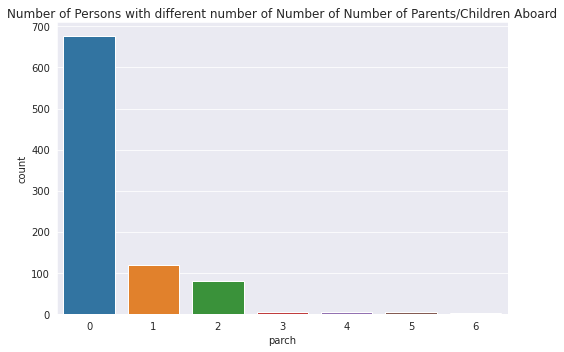

In [36]:
# Countplots
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["figure.autolayout"] = True

sns.countplot(df.parch, x='parch')
plt.title('Number of Persons with different number of Number of Number of Parents/Children Aboard')

plt.show()

Majority of the passengers did not have parents or children on the titanic

### **5.2 Bivariate Analysis**

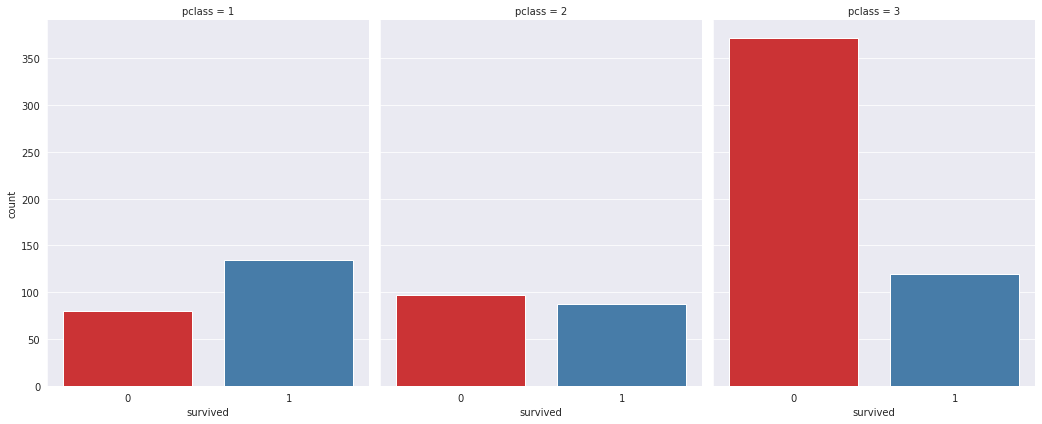

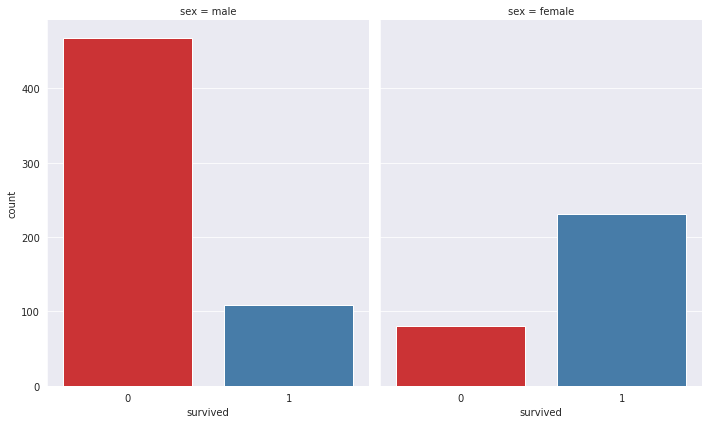

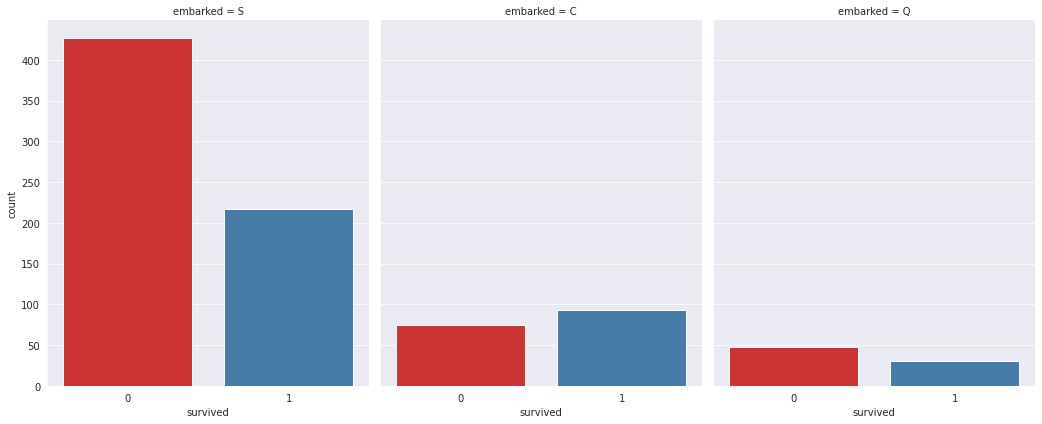

In [37]:
import warnings
warnings.filterwarnings("ignore")
sns.catplot('survived', col='pclass', col_wrap=4, data=df, kind='count', height=6, aspect=.8, palette='Set1')
sns.catplot('survived', col='sex', col_wrap=4, data=df, kind='count', height=6, aspect=.8, palette='Set1')
sns.catplot('survived', col='embarked', col_wrap=4, data=df, kind='count', height=6, aspect=.8, palette='Set1')

plt.show()

1. More people did not survive from Pclass 3 than the othe two classes
2. More people from Pclass 1 one survived
3. More male persons did not survive
4. More female persons survived than male
5. More people from embarked S did not survive but also more people survived from embarked c than the other classes

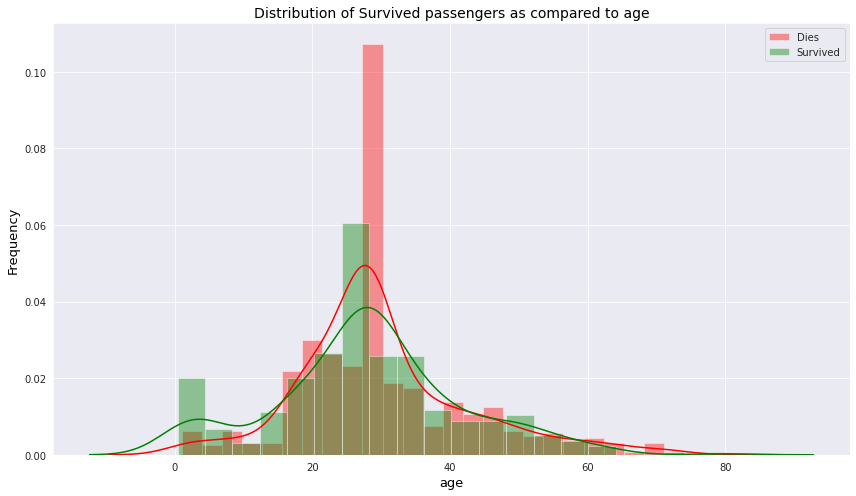

In [38]:
# Plotting histogram to show distribution of survival as compared to age
# 
dies = df.loc[df.survived==0, 'age']    # Selecting only negative datapoints in the age column
survives = df.loc[df.survived==1, 'age']  # Selecting only positive datapoints in the age column

# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(dies, color="red", label="Dies")
sns.distplot(survives, color="green", label="Survived")
plt.title('Distribution of Survived passengers as compared to age', fontsize = 14, color = 'k')
plt.xlabel('age', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

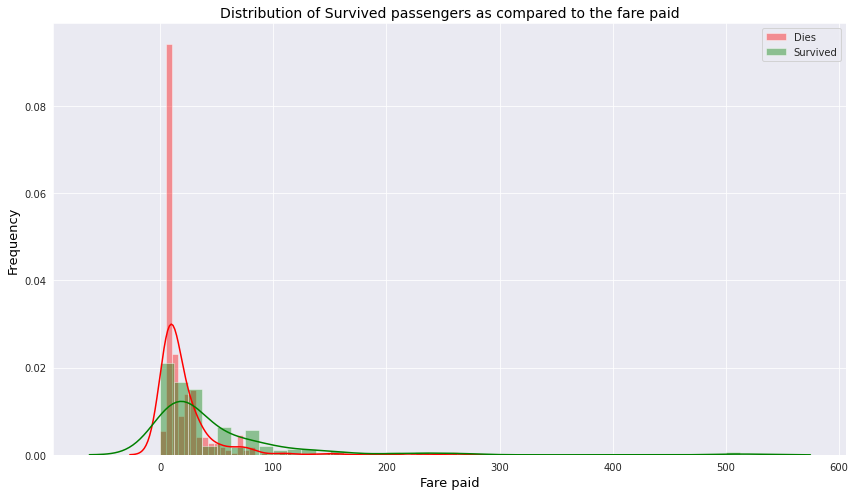

In [39]:
# Plotting histogram to show distribution of survival as compared to fare paid
# 
dies = df.loc[df.survived==0, 'fare']    # Selecting only negative datapoints in the age column
survives = df.loc[df.survived==1, 'fare']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(dies, color="red", label="Dies")
sns.distplot(survives, color="green", label="Survived")
plt.title('Distribution of Survived passengers as compared to the fare paid', fontsize = 14, color = 'k')
plt.xlabel('Fare paid', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

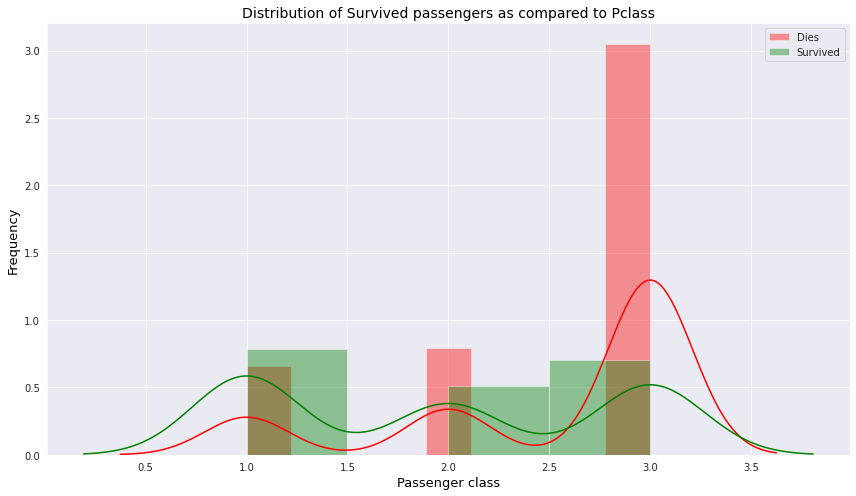

In [40]:
# Plotting histogram to show distribution of survival as compared to Pclass
# 
dies = df.loc[df.survived==0, 'pclass']    # Selecting only negative datapoints in the age column
survives = df.loc[df.survived==1, 'pclass']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(dies, color="red", label="Dies")
sns.distplot(survives, color="green", label="Survived")
plt.title('Distribution of Survived passengers as compared to Pclass', fontsize = 14, color = 'k')
plt.xlabel('Passenger class', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

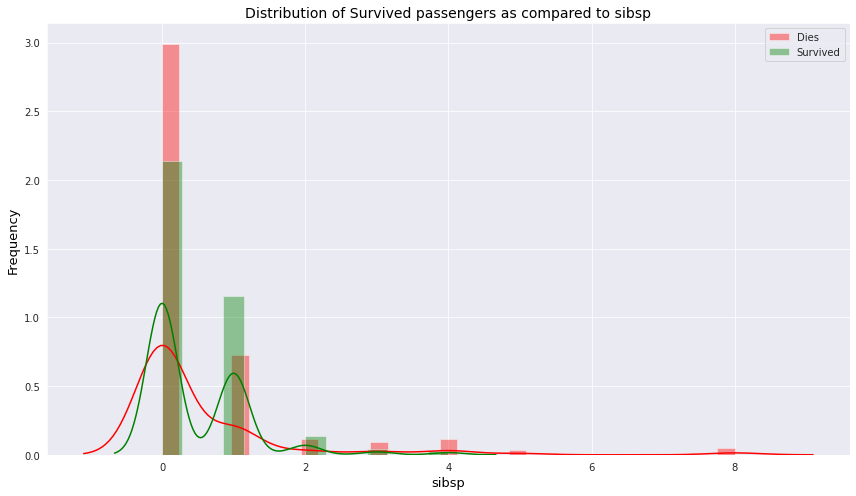

In [41]:
# Plotting histogram to show distribution of survival as compared to Pclass
# 
dies = df.loc[df.survived==0, 'sibsp']    # Selecting only negative datapoints in the age column
survives = df.loc[df.survived==1, 'sibsp']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(dies, color="red", label="Dies")
sns.distplot(survives, color="green", label="Survived")
plt.title('Distribution of Survived passengers as compared to sibsp', fontsize = 14, color = 'k')
plt.xlabel('sibsp', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()

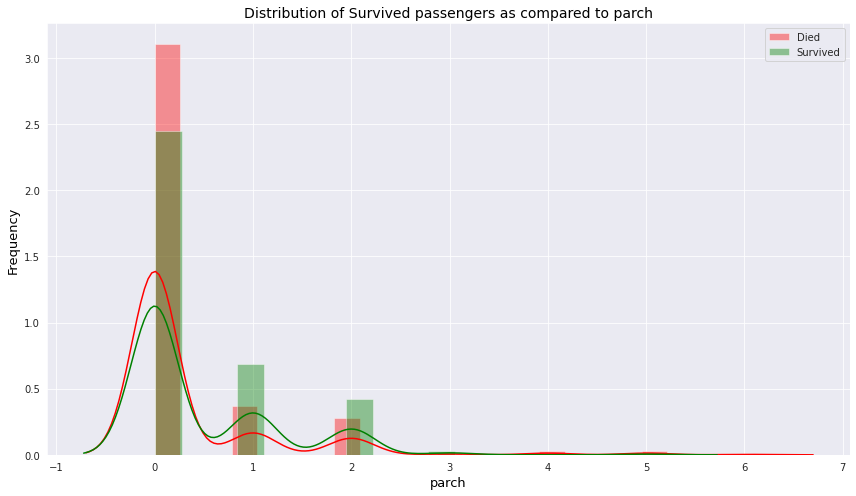

In [42]:
# Plotting histogram to show distribution of survival as compared to Pclass
# 
dies = df.loc[df.survived==0, 'parch']    # Selecting only negative datapoints in the age column
survives = df.loc[df.survived==1, 'parch']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(dies, color="red", label="Died")
sns.distplot(survives, color="green", label="Survived")
plt.title('Distribution of Survived passengers as compared to parch', fontsize = 14, color = 'k')
plt.xlabel('parch', fontsize = 13, color = 'k')
plt.ylabel('Frequency', fontsize = 13, color = 'k')
plt.legend()
plt.show()


In [43]:
#Creating a dataframe for the correlations in our dataset.
correlations = df.corr()
correlations

,passengerid,survived,pclass,age,sibsp,parch,fare
passengerid,1.000000,-0.005028,-0.035330,0.031319,-0.057686,-0.001657,0.012703
survived,-0.005028,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290
pclass,-0.035330,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193
age,0.031319,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707
sibsp,-0.057686,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887
parch,-0.001657,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532
fare,0.012703,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000


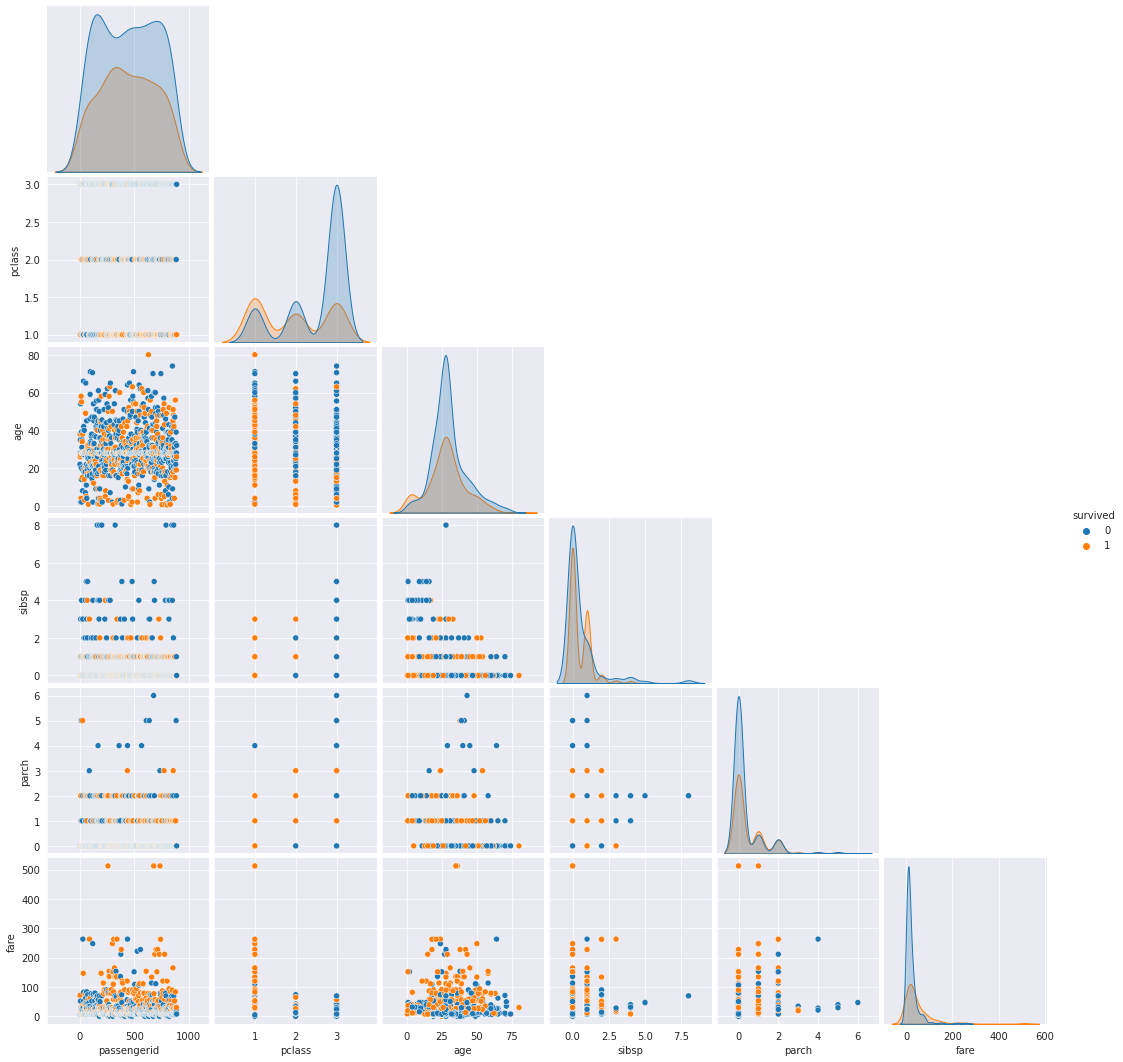

In [44]:
# Pair plot analysis for the whole dataframe
sns.pairplot(df, diag_kind='kde',hue='survived', corner=True)
sns.set_style('white')
plt.show()

Text(0.5, 1.0, 'Correlation between All Features')

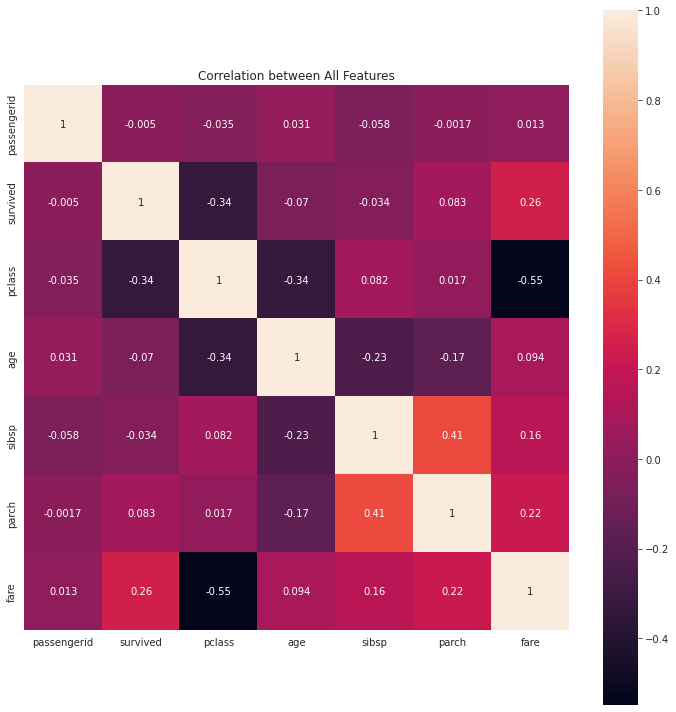

In [45]:
# Check correlation of all columns
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(), square=True,annot=True)

plt.title('Correlation between All Features')

As the classes increase that is (1-3) the fare decreases thus having the negative correlation of -0.55. There is also a slight correlation between fare and family size of 0.22. There is a small positive correlation between fare and one's survival of 0.26. There is a small negative correlation of age and pclass of -0.34. Meaning the aged individuals were better economically thus boarding on the first class. There is also a small negative correlation between one's survival and pclass of -0.34. Meaning the people in first class were given priority.

## **6.0 K-Nearest Neighbour**

**Feature Selection**

In [46]:
# Create a copy of the original dataset
df_copy = df.copy()

In [47]:
# Convert categorical variables to numeriv variables
df['sex'] = np.where(df['sex']=='female',1,0)

# encoding the embarked column
embark = {'embarked':{'Q':0,'S':1, 'C':2}}

df.replace(embark, inplace=True)

df['embarked'].astype(int)

0      1
1      2
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    2
890    0
Name: embarked, Length: 889, dtype: int64

In [48]:
# dropping the unnecessary columns that will not be used in the model
df=df.drop(['passengerid','name','ticket'],axis=1) # 
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1


In [49]:
# After dropping the passengerid column, there may be duplicates
# Check for duplicates
duplicate = df[df.duplicated()]

duplicate

,survived,pclass,sex,age,sibsp,parch,fare,embarked
47,1,3,1,28.0,0,0,7.7500,0
55,1,1,0,28.0,0,0,35.5000,1
76,0,3,0,28.0,0,0,7.8958,1
77,0,3,0,28.0,0,0,8.0500,1
87,0,3,0,28.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
870,0,3,0,26.0,0,0,7.8958,1
877,0,3,0,19.0,0,0,7.8958,1
878,0,3,0,28.0,0,0,7.8958,1
884,0,3,0,25.0,0,0,7.0500,1


In [50]:
# Drop duplicates in ranking dataset
df.drop_duplicates(inplace=True)

# Check for duplicates
df.duplicated().sum()

0

**Baseline Model - 80/20 split**

In [51]:
# Loading the libraries 
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [52]:
# split the data into labels and features

X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked']]
y = df['survived']

# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# setting the dicision tree classifier

# Modelling for training and predictions

clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

In [53]:
# Evaluating the Algorithm
# ---
# 
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.7612903225806451
[[72 12]
 [25 46]]

 Classification report
              precision    recall  f1-score   support

           0       0.74      0.86      0.80        84
           1       0.79      0.65      0.71        71

    accuracy                           0.76       155
   macro avg       0.77      0.75      0.75       155
weighted avg       0.77      0.76      0.76       155



In [54]:
print(X_train.shape)
print(X_test.shape)

(618, 7)
(155, 7)


The 80-20 set has an accuracy score **76.1%**. 

**Baseline Model - 70/30 split**

In [55]:
# split the data into labels and features

X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked']]
y = df['survived']

# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)


# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# setting the dicision tree classifier

# Modelling for training and predictions

clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

In [56]:
# Evaluating the Algorithm
# ---
# 
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.75
[[109  20]
 [ 38  65]]

 Classification report
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       129
           1       0.76      0.63      0.69       103

    accuracy                           0.75       232
   macro avg       0.75      0.74      0.74       232
weighted avg       0.75      0.75      0.75       232



In [57]:
print(X_train.shape)
print(X_test.shape)

(541, 7)
(232, 7)


The 70-30 set has an accuracy score **75%**

**Baseline Model - 60/40 split**

In [58]:
# split the data into labels and features

X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked']]
y = df['survived']

# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=0)


# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# setting the dicision tree classifier

# Modelling for training and predictions

clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

In [59]:
# Evaluating the Algorithm
# ---
# 
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.7322580645161291
[[138  38]
 [ 45  89]]

 Classification report
              precision    recall  f1-score   support

           0       0.75      0.78      0.77       176
           1       0.70      0.66      0.68       134

    accuracy                           0.73       310
   macro avg       0.73      0.72      0.73       310
weighted avg       0.73      0.73      0.73       310



In [60]:
print(X_train.shape)
print(X_test.shape)

(463, 7)
(310, 7)


The 60-40 set has an accuracy score **73.2%**

The accuracy seems to go down every time we decrease the test size (76.11%, 75%, 73.2%). This is because their are fewer points for the KNN algorithm to map in it's space. So it is harder to define points as survived or not. 

## **7.0 Challenging the Solution**

**Performing LDA for Optimisation**

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# split the data into labels and features

X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked']]
y = df['survived']

# splitting into train an test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Feature Scaling
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Peforming LDA

lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# setting the dicision tree classifier

# Modelling for training and predictions

clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(X_train, y_train)

# predicting using the model built

y_pred = clf.predict(X_test)

In [62]:
# Evaluating the Algorithm
# ---
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.7677419354838709

 Confusion matrix
[[71 13]
 [23 48]]

 Classification report
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        84
           1       0.79      0.68      0.73        71

    accuracy                           0.77       155
   macro avg       0.77      0.76      0.76       155
weighted avg       0.77      0.77      0.77       155



Performing LDA on the best performing model 80/20 split gave it only a slight increase in accuracy. 

With LDA - **76.8%**

Withou LDA - **76.1%**

**Logistic Regression**

In [63]:
# Split into features and labels 
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare','embarked']]
y = df['survived']

# Train Test Split (We will use an 80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training and Predictions

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# make predictions on our test data

y_pred = logreg.predict(X_test)

# Evaluating the Algorithm
 
print('The accuracy of the model is ',metrics.accuracy_score(y_test, y_pred))
print('\n', 'Confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('\n', 'Classification report')
print(classification_report(y_test, y_pred))

The accuracy of the model is  0.7483870967741936

 Confusion matrix
[[69 15]
 [24 47]]

 Classification report
              precision    recall  f1-score   support

           0       0.74      0.82      0.78        84
           1       0.76      0.66      0.71        71

    accuracy                           0.75       155
   macro avg       0.75      0.74      0.74       155
weighted avg       0.75      0.75      0.75       155



The KNN model with the 80/20 split performed better than the Logistic regression. 

Logistic Regression - **74.8%**

KNN - **76.1%**

**Conclusion**

In conclusion,  I believe that this KNN model can be put to use to predict whether a passenger will survive or not, on a boat.

**Follow up questions**

**a). Did we have the right data?**

Yes, I believe we had the right data for analysis and modeling

**b). Do we need other data to answer our question?**

no the data is enough to make our predictions

**c). Did we have the right question?**

Yes, the question was right